In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
'''
Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
'''
df=pd.read_csv('BIKE DETAILS.csv')

df.head(10)
print("the first 10 rows of the data is ",df.head(10))


df.shape
print(f"the shape of the data is {df.shape}")


df.columns
print(f"the columns of the data is {df.columns}")

df.describe()
print(f"the describe of the data is {df.describe()}")

df.info()
print(f"the info of the data is {df.info()}")




the first 10 rows of the data is                                     name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                

In [63]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [6]:
'''Question 2: Check for missing values in all columns and describe your approach for
handling them.
'''
df.isnull().sum()
print(f"the missing values in the data is {df.isnull().sum()}")


the missing values in the data is name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Here in there are null values in ex_showroom_price and data of skewed so replacing the null values with median

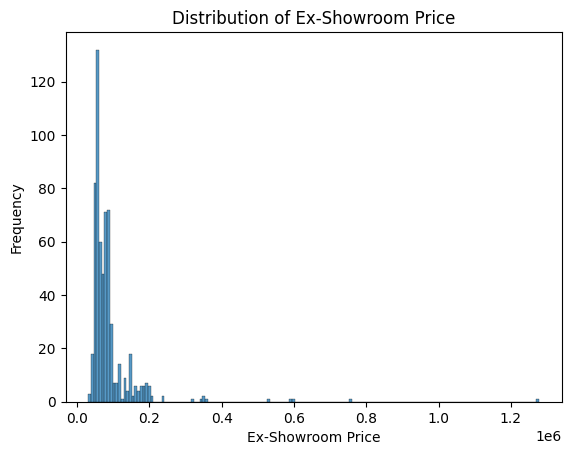

the missing values in the data is name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [7]:
sns.histplot(df['ex_showroom_price'])
plt.title('Distribution of Ex-Showroom Price')
plt.xlabel('Ex-Showroom Price')
plt.ylabel('Frequency')
plt.show()


# Fill missing values in 'ex_showroom_price' with the median of the column
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Verify that there are no more missing values in 'ex_showroom_price'
print(f"the missing values in the data is {df.isnull().sum()}")

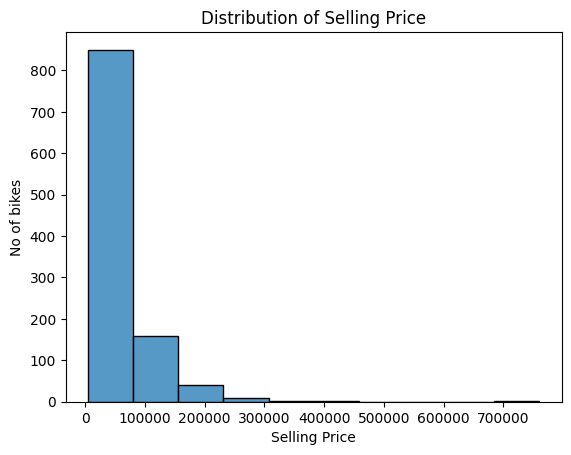

In [27]:
'''
Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
'''
sns.histplot(df['selling_price'],bins=10)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('No of bikes')
plt.show()

#here majority of purchased bikes of price less 1,00,000
#and very few purchased bikes with price> 1,00,000

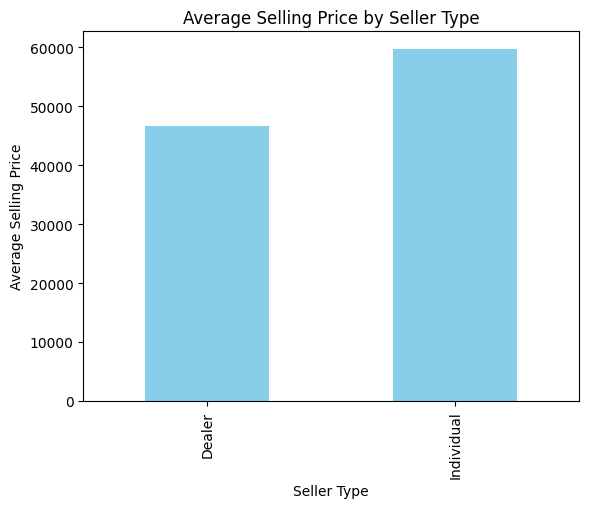

In [28]:
'''
Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation
'''
# Calculate the average selling price for each seller_type
average_selling_price = df.groupby('seller_type')['selling_price'].mean()

# Create a bar plot
average_selling_price.plot(kind='bar', color='skyblue', width=0.5, align='center')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

#ang selling price of dealers is  less than individual selling price

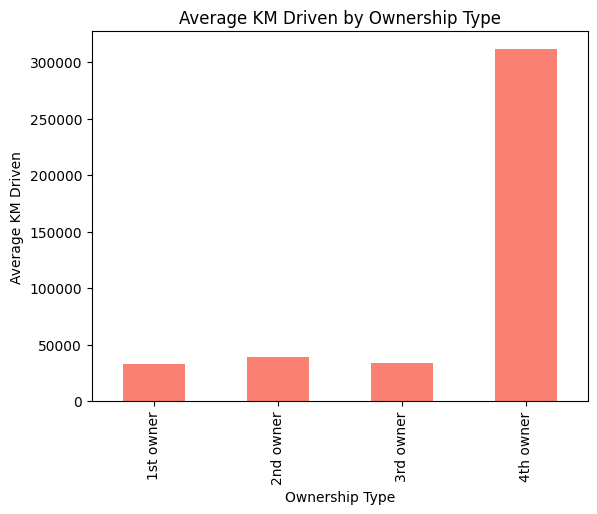

In [10]:
'''
Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
'''
# Calculate the average km_driven for each ownership type
average_km_driven = df.groupby('owner')['km_driven'].mean()

# Create a bar plot
average_km_driven.plot(kind='bar', color='salmon')
plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.show()

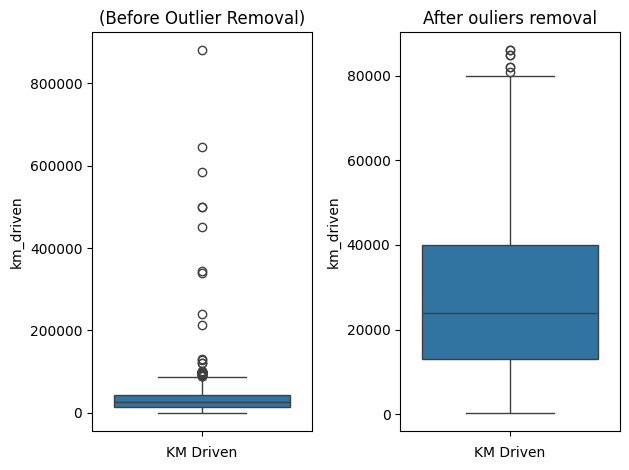

 Before Outlier Removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



\After Outlier Removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


In [29]:
'''
Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
'''
#plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df['km_driven'])
plt.title('(Before Outlier Removal)')
plt.xlabel('KM Driven')


# Calculate the IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()


plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned['km_driven'])
plt.title('After ouliers removal')

plt.xlabel('KM Driven')

plt.tight_layout()
plt.show()

print(" Before Outlier Removal:")
display(df['km_driven'].describe())

print("\n\After Outlier Removal:")
display(df_cleaned['km_driven'].describe())

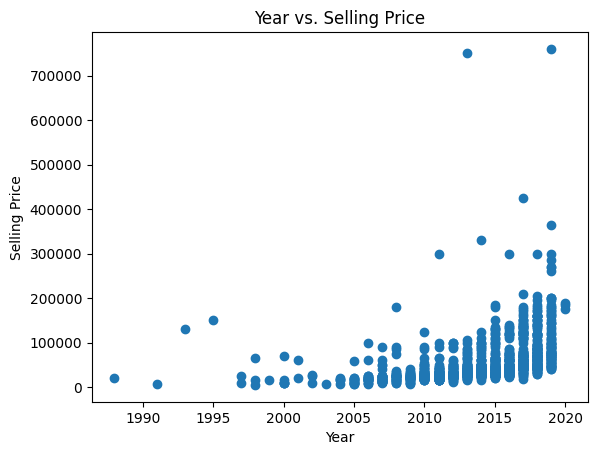

In [12]:
'''
Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
'''
# Create a scatter plot
plt.scatter(df['year'], df['selling_price'])
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

#As year increasing selling price  of bike increasing

In [30]:
'''
Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
'''

#f = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head(5))

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=False,dtype=int)

print("\nAfter One-Hot Encoding (First 5 rows):")
print(df_encoded.head())

Original DataFrame:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  

After One-Hot Encoding (First 5 rows):
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner 

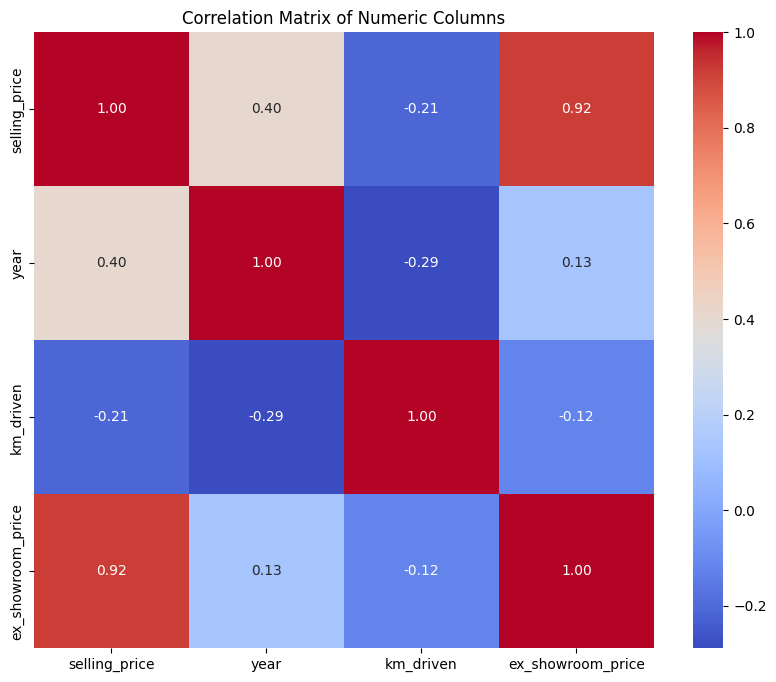

In [31]:
'''
Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
'''
# Select only the numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [15]:
'''Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
'''


"Question 10: Summarize your findings in a brief report:\n● What are the most important factors affecting a bike's selling price?\n● Mention any data cleaning or feature engineering you performed.\n"


Most Important Factors Affecting Selling Price are:

Ex-Showroom Price (Strongest Factor)

Correlation = 0.92 with selling price.

Costlier bikes at purchase usually have higher resale values.

Year of Manufacture (Moderate Factor)

Correlation = 0.40 with selling price.

Newer bikes fetch higher prices in the resale market.

Kilometers Driven (Negative Factor)

Correlation = -0.21 with selling price.

More usage decreases resale value.

Ownership (1st Owner vs 2nd/3rd Owner)

1st owner bikes generally have higher resale prices


2.Handling Missing Values:

ex_showroom_price had many missing values are imputed with median

Encoding Categorical Variables:

seller_type converted into numeric format using one-hot encoding for analysis.with new columns seller_type_Dealer and seller_type_individual